## Code-walkthrough: Basics of Linear Algebra

- Prerequisites: Mathematical concepts from https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/2829/why-learn-it/2/module-2-data-science-exploratory-data-analysis-and-data-visualization

- Agenda: Math ---> Code + Simple concepts
- Future Sessions:
  - Data Matrix operations
  - PCA, SVD, NMF
  - Linear Algebra, Linear Optimization


  

### Vectors and Hyper-planes:
- Representation
- Unit vector 
- Angle between 2 vectors
- Distance from point to plane
- Half-spaces


In [ ]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://i.imgur.com/OR21M2N.png", width=700)

# Question: What data-structure can we use to represent a plane?

In [2]:
import numpy as np

w = np.array([1.2,0,1.1,0,1.4,1.5])
b = 1.2

pi = (w,b) 

print(type(w))
print(w.size)

pi_0 = (w,0)
#NOTE: pi_0 and pi are parallel to each other.

<class 'numpy.ndarray'>
6


In [ ]:
# unit vector: w_hat from w
Image(url= "https://i.imgur.com/w2lNsYq.png", width=700)


In [ ]:
# unit vector: w_hat from w
import math
w_norm = math.sqrt(np.dot(w,w)) # Google:"NumPy Dot product of vctors" ---> https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html
print(w_norm)

print(np.linalg.norm(w, 2)) # Google: "NumPy norm of a vector" --> https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.norm.html

w_hat = w/w_norm

print(w_hat)
print(np.linalg.norm(w_hat, 2))

2.619160170741759
2.619160170741759
[0.45816213 0.         0.41998195 0.         0.53452248 0.57270266]
1.0


In [ ]:
# Angle between 2 vectors v1 and v2.
Image(url= "https://i.imgur.com/zvFu6Du.png", width=400)

In [ ]:
# angle between 2 vectors
np.random.seed(100)

v1 = np.random.rand(6) # a random vector of 6-dim
v2 = np.random.rand(6)

angle_12 = math.acos(np.dot(v1,v2)/(np.linalg.norm(v1, 2) * np.linalg.norm(v2, 2)))
print(angle_12) # in radians


0.8265770779885587


In [ ]:
# Distance from point to a plane.
Image(url= "https://i.imgur.com/SXT6ct1.png", width=500)

In [ ]:
import math
np.random.seed(100)

w = np.random.rand(6)
b = 1.2

x = np.random.rand(6)

d = abs( (np.dot(w,x)+b)/ np.linalg.norm(w,2) )
print(d)

#How would you test if this code is correct?


2.091751043283853


In [ ]:
# simple test-cases
import math
np.random.seed(100)

w = np.array([1,0,0,0,0,0])
b = 0

x = np.array([23,0,0,0,0,0])

d = abs( (np.dot(w,x)+b)/ np.linalg.norm(w,2) )
print(d)

23.0


In [ ]:
# +ve or -ve halfspace
Image(url= "https://i.imgur.com/7QEOe2D.png", width=500)

In [ ]:
import math
np.random.seed(100)

w = np.random.rand(6)
b = 1.2

x = np.random.rand(6)

sign =  np.sign( (np.dot(w,x)+b)/ np.linalg.norm(w,2) )
print(sign)

# How to test it?

1.0


In [ ]:
import math
np.random.seed(100)

w = np.random.rand(6)
b = 1.2

x = np.array([0,0,0,0,0,0])

sign =  np.sign( (np.dot(w,x)+b)/ np.linalg.norm(w,2) )
print(sign)

# GOOD IDEA: Implement all of these above snippets as functions so taht we can reuse them

1.0


### Matrices
- Often used to represent data: data matrices
- Basic Operations: Add, Multiply
- Frobenius norm
- Haddarmard product


In [ ]:
# Basic opearations 
import numpy as np
import math

np.random.seed(100)

n=10
d=4

X1 = np.random.rand(n,d) # n data points of d-dim each
X2 = np.random.rand(n,d) # n data points of d-dim each

w = np.random.rand(d)  # a d-dim vector

print(X1)
print("************************************************************")
print(X2)
print("************************************************************")
print(X1+X2)
print("************************************************************")

print(X1*X2) # hadammard product (or) element wise product
print("************************************************************")

print(np.matmul(X1,X2)) #https://docs.scipy.org/doc/numpy/reference/generated/numpy.matmul.html#numpy.matmul
print("************************************************************")


[[0.54340494 0.27836939 0.42451759 0.84477613]
 [0.00471886 0.12156912 0.67074908 0.82585276]
 [0.13670659 0.57509333 0.89132195 0.20920212]
 [0.18532822 0.10837689 0.21969749 0.97862378]
 [0.81168315 0.17194101 0.81622475 0.27407375]
 [0.43170418 0.94002982 0.81764938 0.33611195]
 [0.17541045 0.37283205 0.00568851 0.25242635]
 [0.79566251 0.01525497 0.59884338 0.60380454]
 [0.10514769 0.38194344 0.03647606 0.89041156]
 [0.98092086 0.05994199 0.89054594 0.5769015 ]]
************************************************************
[[0.74247969 0.63018394 0.58184219 0.02043913]
 [0.21002658 0.54468488 0.76911517 0.25069523]
 [0.28589569 0.85239509 0.97500649 0.88485329]
 [0.35950784 0.59885895 0.35479561 0.34019022]
 [0.17808099 0.23769421 0.04486228 0.50543143]
 [0.37625245 0.5928054  0.62994188 0.14260031]
 [0.9338413  0.94637988 0.60229666 0.38776628]
 [0.363188   0.20434528 0.27676506 0.24653588]
 [0.173608   0.96660969 0.9570126  0.59797368]
 [0.73130075 0.34038522 0.0920556  0.46349802

ValueError: ignored

In [ ]:
print((np.matmul(X1,X2.T)).shape) #https://docs.scipy.org/doc/numpy/reference/generated/numpy.matmul.html#numpy.matmul
print("************************************************************")

(10, 10)
************************************************************


In [ ]:
# w.X

print(np.dot(w,X1[0,:]))

print(np.matmul(w,X1.T)) # alwasys make sure the dimensions match.

print(np.matmul(X1, w.T))

print(np.matmul(w,X1))

1.3633657660004666
[1.36336577 1.18671009 0.7986263  1.19082077 1.13103214 1.06798649
 0.37566246 1.32138202 0.98996493 1.54691292]
[1.36336577 1.18671009 0.7986263  1.19082077 1.13103214 1.06798649
 0.37566246 1.32138202 0.98996493 1.54691292]


ValueError: ignored

In [ ]:
# Forebnius norm: 
Image(url= "https://i.imgur.com/hNSMzzE.png", width=300)

In [ ]:
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.norm.html
print(np.linalg.norm(X1, 'fro'))


# implement using the formula
sh = X1.shape;
print(sh)

sum = 0
for i in range(sh[0]):
  for j in range(sh[1]):
    sum += X1[i,j]**2

print(math.sqrt(sum))


3.5450215353341896
(10, 4)
3.54502153533419


In [ ]:
#NOTE: We will see many other operations on Data-Matrices in future sessions/chapters.

### Convolution 
- Used in Deep-learning and Computer-Vision a lot
- Image: Matrix of pixel values


In [ ]:
# Convolution: Google Image search ---> Apple's developer blog.

Image(url= "https://docs-assets.developer.apple.com/published/09348c5368/a55b1477-4f79-4221-8aa1-ab3ae9f01f89.png", width=400)

In [6]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


<class 'numpy.ndarray'>
(512, 512)


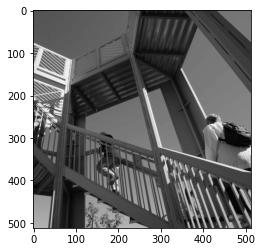

In [9]:
import scipy
from scipy import signal
from scipy import misc

ascent = scipy.misc.ascent() # inbuilt image in Scipy
print(type(ascent))
print(ascent.shape)

import matplotlib.pyplot as plt
img_plot = plt.imshow(ascent, cmap='gray', vmin=0, vmax=255)



[[0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025
  0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025]
 [0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025
  0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025]
 [0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025
  0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025]
 [0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025
  0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025]
 [0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025
  0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025]
 [0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025
  0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025]
 [0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025
  0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 0.0025 

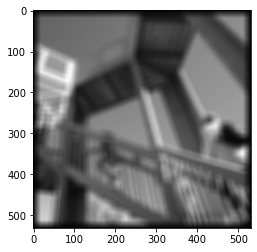

In [11]:
k=20
kernel = np.ones((k,k))
kernel /= np.sum(kernel)

print(kernel)

blurred = signal.convolve2d(ascent, kernel) # https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html

plt.imshow(blurred , cmap='gray')
plt.show()

 **Will revsit these kernels again when we learn basics of Computer Vision and Image processing**
<br>
Further reading: http://www.degeneratestate.org/posts/2016/Oct/23/image-processing-with-numpy/

### Hyper-Sphere
- Simple extension to a Circle to d-dim space
- Representation
- Inside/Outside
- Distance from point to Hyper-Sphere


In [ ]:

Image(url= "https://i.imgur.com/6ub3S4v.png", width=500)

In [12]:
# Representation:

np.random.seed(100)

c = np.random.rand(10)
r = 10;
print(c)
print(r)

circle = (c,r)




None
[0.54340494 0.27836939 0.42451759 0.84477613 0.00471886 0.12156912
 0.67074908 0.82585276 0.13670659 0.57509333]
10


In [ ]:
#inside/outside

x1 = c + np.zeros(10);

d_x1_c = np.linalg.norm(x1-c)
print(d_x1_c)


x2 = c + r + (np.ones(10)*0.1) ;
d_x2_c = np.linalg.norm(x2-c)
print(d_x2_c)




0.0
31.93900436770063


In [ ]:
# distance from a point to hyper-sphere
x2 = c + r + (np.ones(10)*0.1) ;
d_x2 = np.linalg.norm(x2-c) - r 
print(d_x2)

21.93900436770063


### Other topics in Linear Algebra 
[ Will be covered in future sessions ] 
- Next Sessions:
  - Data matrix, Normalization and Standardization 
  - Principal Component Analysis
  - Dimensionality Reduction & t-SNE
- Linear Regression [ after Logistic regression]
- Linear Programming [Optimization methods]
- Singular Value Decomposition [ Recommender Systms ]
- Matrix Factorization & NMF [ Recommender Systms ]

### More Linear Algebra @ Undergrad level
- https://gate.appliedcourse.com/lecture/10/engineering-discrete-mathematics/662/linear-algebra-why-and-how
